<a href="https://colab.research.google.com/github/anjali88/Data-Science/blob/master/Pushpanjali_Banik_Deploy_a_prebuilt_module_to_the_Edge_device.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## import libraries
import numpy as np
import pandas as pd
#import re
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
## mount Google Drive to simplify file loading into the notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [0]:
## Function to read input file, preprocess and save as csv
def preprocess(inputFile, outputFile):
  # load file line by line as json
  data = [json.loads(line) for line in open(inputFile, 'r')]
  data_len = len(data)
  print('Loaded lines:', data_len)
  # define columns
  columns = ['machine_temperature','machine_pressure', 'ambient_temperature', 'ambient_humidity', 'time_created']
  # instantiate dataframe 
  df = pd.DataFrame(columns=columns, index=range(data_len))
  # loop through data
  for i in range(data_len):
    item = data[i]
    # we are only interested in items that contain 'Body'
    if item['log'].find('Body') != -1:
      # identify Body payload that is between square brakets []
      start = item['log'].find('[')
      end = item['log'].find(']')
      #print('start', start)
      #print('end',end)
      log = item['log']
      # load JSON string
      d = json.loads(log[start:end+1])
      # populate dataframe row i
      df.at[i, 'machine_pressure'] = d[0]['machine']['pressure'] 
      df.at[i, 'machine_temperature'] = d[0]['machine']['temperature']
      df.at[i, 'ambient_temperature'] = d[0]['ambient']['temperature']
      df.at[i, 'ambient_humidity'] = d[0]['ambient']['humidity'] 
      df.at[i, 'time_created'] = d[0]['timeCreated']      
    # foe loop end
  # drop NaN rows
  df.dropna(inplace=True)
  print(df)
  # save to csv
  df.to_csv(outputFile)

preprocess('log.log', 'log_parsed.csv') 

Loaded lines: 239
    machine_temperature  ...                  time_created
6               21.1291  ...  2020-01-11T16:40:44.7125855Z
7               22.1696  ...  2020-01-11T16:40:49.9417456Z
8               23.0773  ...   2020-01-11T16:40:54.987393Z
9               22.8502  ...  2020-01-11T16:41:00.0099104Z
10              23.6938  ...  2020-01-11T16:41:05.0349817Z
..                  ...  ...                           ...
234             99.6657  ...  2020-01-11T16:59:50.1362326Z
235             99.7875  ...   2020-01-11T16:59:55.158528Z
236             100.203  ...  2020-01-11T17:00:00.1809896Z
237              100.16  ...  2020-01-11T17:00:05.2032925Z
238             99.7866  ...   2020-01-11T17:00:10.227775Z

[233 rows x 5 columns]


    machine_temperature  ...                  time_created
6             21.129125  ...  2020-01-11T16:40:44.7125855Z
7             22.169573  ...  2020-01-11T16:40:49.9417456Z
8             23.077280  ...   2020-01-11T16:40:54.987393Z
9             22.850183  ...  2020-01-11T16:41:00.0099104Z
10            23.693788  ...  2020-01-11T16:41:05.0349817Z

[5 rows x 5 columns]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc64cf17a90>


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

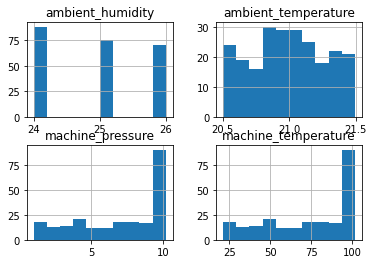

In [0]:
# read parsed log data into DataFrame
df = pd.read_csv('log_parsed.csv',header=0, index_col=0)
print(df.head())

# plot histogram
print(df[df.columns].hist())

In [0]:
# Density Plot
def densityPlot(column, hist, kde):
  sns.kdeplot(df[column],bw=1.5)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

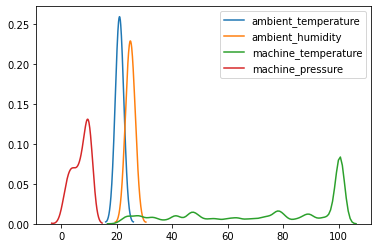

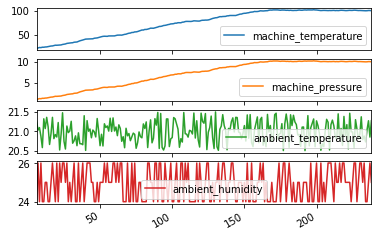

In [0]:
columns = ['ambient_temperature', 'ambient_humidity','machine_temperature','machine_pressure']
for column in columns:
  densityPlot(column, True, True)

## Plot time series
df.plot(subplots=True)
plt.show()

The plots show that ambient measurments remain stable, however, machine temperature and pressure increase over time.
